In [1]:
import os
import pandas as pd
import torch
import RNNutils as utils

In [2]:
drama=pd.read_csv('1.csv').text
pop=pd.read_csv('2.csv').text
outsea=pd.read_csv('3.csv').text
from konlpy.tag import Okt

tokenizer=Okt()

dramatokens=utils.getToken(drama,tokenizer)
poptokens=utils.getToken(pop,tokenizer)
outseatokens=utils.getToken(outsea,tokenizer)

In [3]:
print(len(dramatokens),len(poptokens),len(outseatokens))

4613 3596 2638


In [4]:
dramatokens[0]

['선희',
 '박주현',
 '가다',
 '교통사고',
 '당하다',
 '날',
 '지현우',
 '이시우',
 '늘다',
 '다급하다',
 '도망치다',
 '행인',
 '목격',
 '선희',
 '차로',
 '밀치다',
 '범인',
 '이자',
 '실종',
 '이수연',
 '빈',
 '이르다',
 '확신']

In [80]:
def getname(num):
    name={0:'드라마',1:'가요',2:'해외연예'}
    return name[num]

In [47]:
dramaDF=pd.DataFrame(pd.Series(dramatokens),columns=['tokens']).sample(frac=0.8)
dramaDF['label']=0

popDF=pd.DataFrame(pd.Series(poptokens),columns=['tokens'])
popDF['label']=1

overseaDF=pd.DataFrame(pd.Series(outseatokens),columns=['tokens'])
overseaDF['label']=2
print(dramaDF.shape,popDF.shape,overseaDF.shape)


(3690, 2) (3596, 2) (2638, 2)


In [48]:
dataDF=pd.concat([dramaDF,popDF,overseaDF],axis=0,ignore_index=True)
print(dataDF.shape)
trainDF=dataDF.sample(frac=0.9,random_state=10)
testDF=dataDF.drop(trainDF.index)
print(trainDF.shape,testDF.shape)

(9924, 2)
(8932, 2) (992, 2)


In [49]:
trainDF

,tokens,label
2416,"[은주, 선희, 입양, 싶다, 뜻, 조심, 스럽게, 진혁, 김병철, 밝히다, 진혁,...",0
4509,"[이번, 신곡, 지난, 발매, 데뷔, 곡, 엠, 아이, 오다, 발표, 번째, 디지털...",1
9367,"[놓다, 특정하다, 시기, 린킨, 파크, 아니다, 린킨, 파크, 라는, 밴드, 자체...",2
4147,"[한편, 늘다, 날, 곡, 무대, 연달, 몰아치다, 시상식, 현장, 뜨겁다, 달구다...",1
2257,"[마이데일리, 강다윤, 케이블, 채널, 월화드라마, 가석방, 심사, 관, 한신, 극...",0
...,...,...
4319,"[세라핌, 비롯, 많다, 가수, 이미, 나오다, 노래, 다시, 부르다, 리믹스, 버...",1
6167,"[그룹, 원, 하모니, 기호, 오후, 경기도, 고양시, 드림, 센터, 열리다, 챔피...",1
7741,"[그렇다, 채플, 론, 이라는, 아티스트, 남다르다, 캐릭터, 보컬, 찰리, 음악,...",2
2388,"[박경림, 기억나다, 한국말, 묻다, 사카, 구치, 겐타, 로는, 얼음, 팥빙수, ...",0


In [50]:
# 단어사전 생성 및 넘버링
vocab=utils.get_vocab(trainDF.tokens,n_vocab=10000)

token_to_idx={token:idx for idx,token in enumerate(vocab)}
idx_to_token={idx:token for idx,token in enumerate(vocab)}

print(token_to_idx)

{'<pad>': 0, '<oov>': 1, '않다': 2, '말': 3, '받다': 4, '오다': 5, '늘다': 6, '보다': 7, '가다': 8, '없다': 9, '사람': 10, '모습': 11, '지난': 12, '함께': 13, '같다': 14, '무대': 15, '팬': 16, '공연': 17, '곡': 18, '공개': 19, '날': 20, '자신': 21, '방송': 22, '아니다': 23, '드라마': 24, '배우': 25, '사랑': 26, '통해': 27, '위': 28, '그렇다': 29, '에는': 30, '시간': 31, '싶다': 32, '밝히다': 33, '첫': 34, '라는': 35, '석류': 36, '음악': 37, '생각': 38, '시작': 39, '마음': 40, '이번': 41, '멤버': 42, '좋다': 43, '사진': 44, '많다': 45, '미국': 46, '이후': 47, '손해': 48, '가족': 49, '속': 50, '작품': 51, '어떻다': 52, '집': 53, '크다': 54, '들다': 55, '중': 56, '내다': 57, '앨범': 58, '활동': 59, '출연': 60, '한편': 61, '그룹': 62, '대표': 63, '대한': 64, '이야기': 65, '만들다': 66, '영상': 67, '현지': 68, '최승': 69, '서울': 70, '이라고': 71, '따르다': 72, '사실': 73, '온': 74, '데뷔': 75, '연기': 76, '콘서트': 77, '예정': 78, '현': 79, '선보이다': 80, '일본': 81, '한국': 82, '앞': 83, '특히': 84, '역': 85, '시키다': 86, '보이다': 87, '자다': 88, '원': 89, '만나다': 90, '주다': 91, '발매': 92, '영화': 93, '진행': 94, '투어': 95, '다시': 96, '오후': 97, '스타': 98, '민': 99, '가수

(array([4.854e+03, 2.606e+03, 9.890e+02, 3.160e+02, 1.240e+02, 2.200e+01,
        1.400e+01, 3.000e+00, 1.000e+00, 3.000e+00]),
 array([ 16. ,  28.5,  41. ,  53.5,  66. ,  78.5,  91. , 103.5, 116. ,
        128.5, 141. ]),
 <BarContainer object of 10 artists>)

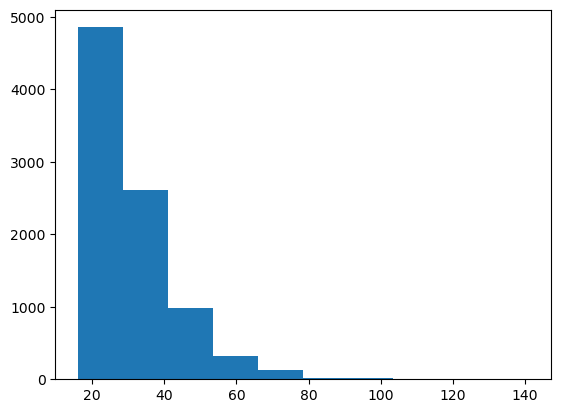

In [51]:
import matplotlib.pyplot as plt
plt.hist([len(token) for token in trainDF.tokens])

In [52]:
trainnum=utils.padding_vectorize(trainDF.tokens,token_to_idx,pad_length=30)
testnum=utils.padding_vectorize(testDF.tokens,token_to_idx,pad_length=30)

In [53]:
trainnum

array([[2235,  545, 1702, ..., 7002,    2,    0],
       [  41,  422,   12, ...,    0,    0,    0],
       [ 788, 8057, 1533, ...,    0,    0,    0],
       ...,
       [  29, 5960, 2675, ...,    0,    0,    0],
       [9002, 6981,    1, ...,    0,    0,    0],
       [  69, 1715,  210, ...,   36,  814,   10]])

In [54]:

train_text=torch.tensor(trainnum)
train_label=torch.FloatTensor(trainDF.label.values)

test_text=torch.tensor(testnum)
test_label=torch.FloatTensor(testDF.label.values)


In [55]:
from torch.utils.data import TensorDataset,DataLoader

trainDS=TensorDataset(train_text,train_label)
testDS=TensorDataset(test_text,test_label)

trainDL=DataLoader(trainDS,batch_size=64)
testDL=DataLoader(testDS,batch_size=len(testDS))

In [83]:
model=utils.SentenceClassifier(n_vocab=len(token_to_idx),hidden_dim=128,embedding_dim=64,n_layers=2,feature_n=3,dropout=0.8)

import torch.optim as optim
import torch.nn as nn
from torchmetrics.classification import MulticlassF1Score
import torch.optim.lr_scheduler as lr_scheduler

optimizer=optim.Adam(model.parameters(),lr=0.001)
lossfun=nn.CrossEntropyLoss()
scorefun=MulticlassF1Score(num_classes=3)
scheduler=lr_scheduler.ReduceLROnPlateau(optimizer,patience=10,factor=0.5,mode='max')


In [ ]:
EPOCH=100
TV=utils.Train_val(trainDL,testDL,model,optimizer,lossfun,scorefun)
train=TV.train(EPOCH,scheduler,1)

[1/100]
train loss 1.0387469819613866, train score 0.35036361228142465
test loss 0.8351818323135376, test score 0.6305775046348572
scheduler.num_bad_epochs 0/10
[2/100]
train loss 0.6837266781500407, train score 0.7019682466983795
test loss 0.6081469655036926, test score 0.7156740427017212
scheduler.num_bad_epochs 0/10
[3/100]
train loss 0.4966179147362709, train score 0.8031229998384203
test loss 0.44562312960624695, test score 0.8276868462562561
scheduler.num_bad_epochs 0/10
[4/100]
train loss 0.3562341157879148, train score 0.870811458996364
test loss 0.3920976519584656, test score 0.8548111915588379
scheduler.num_bad_epochs 0/10
[5/100]
train loss 0.27256625087133474, train score 0.9038111980472292
test loss 0.37829744815826416, test score 0.8677150011062622
scheduler.num_bad_epochs 0/10
[6/100]
train loss 0.20825381449290684, train score 0.9322296014853886
test loss 0.37335965037345886, test score 0.8793231248855591
scheduler.num_bad_epochs 0/10
[7/100]
train loss 0.16504567393234

model 1  0.913  
model 2 0.9156588315963745  
model 3 
[30/100]
train loss 0.0012453502659549745, train score 0.999683449949537  
test loss 0.45891261100769043, test score 0.9229554533958435  
scheduler.num_bad_epochs 0/10  


In [71]:
from sklearn.metrics import classification_report

model=torch.load('model/best_model3.pth',weights_only=False)
testDL=DataLoader(testDS,batch_size=len(testDS))
for feature, target in testDL:
    pre_y=model(feature)
    print(classification_report(target.detach().numpy(),torch.argmax(pre_y,dim=1).numpy()))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93       364
         1.0       0.91      0.93      0.92       367
         2.0       0.91      0.88      0.90       261

    accuracy                           0.92       992
   macro avg       0.92      0.92      0.92       992
weighted avg       0.92      0.92      0.92       992



In [82]:

news=["10일(한국시간) 미국 연예매체 백그리드는 할리우드 배우 마고 로비의 근황이 담긴 사진을 공개했다.보도에 따르면 만삭의 '바비' 인형 스타는 제작진과 함께 미국 캘리포니아 산타모니카에 있는 '시그니처 포스트' 편집실을 떠나면서 미소를 지어 보였다. 아름다운 D라인 역시 시선을 사로잡는다."]
newtokens=utils.getToken(news,tokenizer)
newvector=utils.padding_vectorize(newtokens,token_to_idx,pad_length=30)
newTS=torch.tensor(newvector)
pre_y=model(newTS)
print(getname(torch.argmax(pre_y).item()))

해외연예


In [ ]:
news=["""극 중 시골마을 금제의 ‘잇걸’ 이주리 역으로 새로운 변신을 앞둔 이세희가 화려한 미모로 캐릭터에 대한 관심을 고조시킨다. 작품의 포스터 촬영 현장 비하인드 컷이 공개된 가운데, 이세희는 핑크 빛 스타일링으로 ‘핫’한 매력을 가감 없이 발휘, 눈을 뗄 수 없는 다채로운 면모로 시선을 강탈하고 있는 것. 90년대 미스코리아를 연상케 하는 사자머리와 색조 메이크업도 완벽하게 소화한 그녀는 핑크 색상의 의상부터 리본, 귀걸이, 선글라스, 장갑 등의 다양한 소품들까지 더해 사랑스러운 분위기를 극대화하고 있다."""]
newtokens=utils.getToken(news,tokenizer)
newvector=utils.padding_vectorize(newtokens,token_to_idx,pad_length=30)
newTS=torch.tensor(newvector)
pre_y=model(newTS)
print(getname(torch.argmax(pre_y).item()))